In [4]:
import torch
from torch import nn
import torchvision

In [5]:
device= torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

ok the next part of the code is not our objective or part of the study we are just downloading a Food101 dataset from torchvisions datasets but one that has been formated to only include only 3 classes and  like 100 of them instead of the 1000

In [6]:
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...") 
        zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


ok now lets see what is in the directories we just downloaded, ineffect we will create a function that allows us to see subdirectories the number of images in each directories

In [11]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [21]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.


In [22]:
ls

data/  sample_data/


In [24]:
ls ./data

pizza_steak_sushi/  pizza_steak_sushi.zip


In [25]:
ls ./data/pizza_steak_sushi/

test/  train/


In [26]:
ls ./data/pizza_steak_sushi/train

pizza/  steak/  sushi/


In [27]:
image_path

PosixPath('data/pizza_steak_sushi')

In [28]:
train_dir= image_path / "train"
test_dir=  image_path / "test"
train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

Image path:  data/pizza_steak_sushi/train/sushi/2590819.jpg
Image class:  sushi
Image width: 512
Image height: 512 


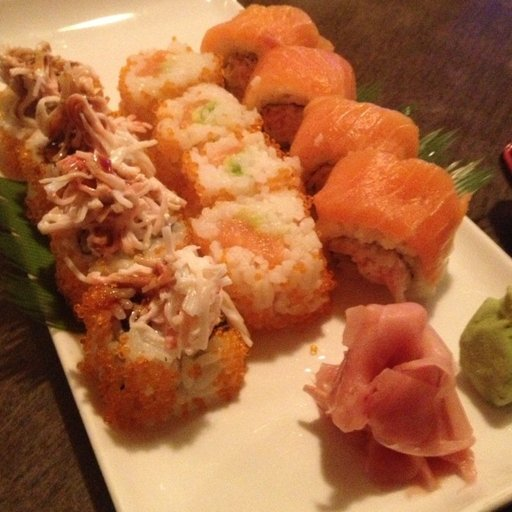

In [39]:
import random
from PIL import Image

random.seed(42)

image_path_list= list(image_path.glob("*/*/*.jpg"))
selected_image_path=random.choice(image_path_list)
selected_image_class= selected_image_path.parent.stem
img=Image.open(selected_image_path)
print("Image path: ", selected_image_path)
print("Image class: ", selected_image_class)
print(f"Image width: {img.width}")
print(f"Image height: {img.height} ")
img


Another way of displaying the picture like we did above

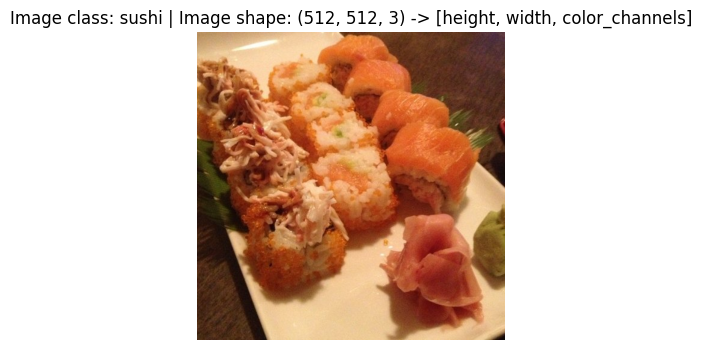

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with matplotlib
plt.figure(figsize=(4, 4))
plt.imshow(img_as_array)
plt.title(f"Image class: {selected_image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False);